In [1]:
#imports for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
#load dataset
df = pd.read_csv('customer_booking.csv',encoding='latin-1')

In [8]:
#view first 5 rows
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
#statistical data for each column
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [10]:
#explore value caults for different columns
df["flight_hour"].value_counts()

flight_hour
8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: count, dtype: int64

In [11]:
df["num_passengers"].value_counts()

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

In [16]:
df["booking_origin"].value_counts().head(30)

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
Indonesia                2369
Taiwan                   2077
Thailand                 2030
India                    1270
New Zealand              1074
Singapore                1044
United States             456
Vietnam                   388
Macau                     304
Hong Kong                 295
Philippines               266
United Kingdom            173
Brunei                    167
Cambodia                  132
(not set)                  84
Sri Lanka                  73
France                     59
Italy                      58
Canada                     57
Germany                    57
Myanmar (Burma)            51
Netherlands                46
Mauritius                  44
United Arab Emirates       42
Nepal                      40
Name: count, dtype: int64

In [66]:
#create a group_size function
def group_type(row):
    if row["num_passengers"] == 1:
        return 1
    elif row["num_passengers"] == 2:
        return 2
    elif row["num_passengers"] >= 3 and row["num_passengers"] <= 5:
        return 3
    elif row["num_passengers"] >= 6:
        return 4
    

In [67]:
#apply function to dataframe
features['group_size'] = features.apply (lambda row: group_type(row), axis=1)

In [26]:
#create function to determine if flight is AM or PM
def am_pm(row):
    if row["flight_hour"] > 12:
        return 1
    else:
        return 0

In [27]:
#apply function to column
df["am_pm"] = df.apply (lambda row: am_pm(row), axis = 1)

In [31]:
#check for new columns
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,group_size,am_pm
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,2.0,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,2.0,1
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,2.0,1


In [32]:
#replace day with numerical values
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [33]:
#create function to determine if flight in on weekend
def weekend(row):
    if row["flight_day"] > 5:
        return 1
    else:
        return 0

In [34]:
#apply function to dataframe
df["weekend"] = df.apply (lambda row: weekend(row), axis = 1)

In [36]:
#check for new column
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,group_size,am_pm,weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,2.0,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2.0,1,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,2.0,1,0


In [39]:
#check values
df["sales_channel"].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [40]:
#since there are only two values, change sales_map column to 0 and 1
sales_map = {
    "Internet": 0,
    "Mobile": 1,}
df["sales_channel"] = df["sales_channel"].map(sales_map)

In [42]:
df["trip_type"].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [51]:
#get dummies for trip_type column since there are more than two possible values
df2 = pd.get_dummies(data = df2, columns = ["trip_type"], drop_first = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   purchase_lead          50000 non-null  int64  
 3   length_of_stay         50000 non-null  int64  
 4   flight_hour            50000 non-null  int64  
 5   flight_day             50000 non-null  int64  
 6   route                  50000 non-null  object 
 7   booking_origin         50000 non-null  object 
 8   wants_extra_baggage    50000 non-null  int64  
 9   wants_preferred_seat   50000 non-null  int64  
 10  wants_in_flight_meals  50000 non-null  int64  
 11  flight_duration        50000 non-null  float64
 12  booking_complete       50000 non-null  int64  
 13  group_size             49439 non-null  float64
 14  am_pm                  50000 non-null  int64  
 15  we

In [56]:
#replace with 'True' and 'False" with 1 and 0, respectively
df2["trip_type_OneWay"] = df2["trip_type_OneWay"].replace({"False" : 0, "True" : 1})

In [57]:
df2["trip_type_RoundTrip"] = df2["trip_type_RoundTrip"].replace({"False" : 0, "True" : 1})

In [59]:
df2.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,group_size,am_pm,weekend,trip_type_OneWay,trip_type_RoundTrip
0,2,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,2.0,0,1,False,True
1,1,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0,1,False,True
2,2,0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2.0,1,0,False,True
3,1,0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0,1,False,True
4,2,0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,2.0,1,0,False,True


In [62]:
features = df2.drop(columns = ["route", "booking_complete"], axis = 1)

In [69]:
#look at correlation between features and target variable (booking_complete)
features.corr()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,group_size,am_pm,weekend,trip_type_OneWay,trip_type_RoundTrip
num_passengers,1.000000,-0.002457,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116,0.938276,0.018600,0.025070,-0.002195,0.002435
sales_channel,-0.002457,1.000000,-0.013399,-0.060352,0.022375,0.042095,-0.054254,0.032943,-0.022235,-0.038629,-0.041060,-0.000751,0.028713,0.044556,-0.018415,0.021905
purchase_lead,0.212606,-0.013399,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131,0.234003,0.044684,0.086171,0.006452,-0.008327
length_of_stay,-0.115850,-0.060352,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408,-0.122923,-0.044464,-0.004365,-0.013053,0.009968
flight_hour,0.015607,0.022375,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127,0.017177,0.771453,0.033295,0.003050,-0.003134
flight_day,0.015407,0.042095,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986,0.018098,0.027245,0.781141,-0.002426,0.000166
wants_extra_baggage,0.120404,-0.054254,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139,0.130893,-0.024568,-0.003756,0.007847,-0.012606
wants_preferred_seat,0.028544,0.032943,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116,0.040414,0.005534,0.011849,-0.007953,0.007181
wants_in_flight_meals,0.022943,-0.022235,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511,0.024148,-0.002706,0.005153,-0.014442,0.014120
flight_duration,-0.063169,-0.038629,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266,-0.060270,-0.047780,0.024154,0.040666,-0.043280


In [70]:
target = features[["booking_complete"]]

In [72]:
features = features.drop(columns = "booking_complete", axis = 1)

In [75]:
#create seprate dataframes for target and feature varaibles
X = features.copy()
Y = target.copy()

In [ ]:
#import mutual info to determine most important features
from sklearn.feature_selection import mutual_info_classif

In [83]:
#print mutual info scores
mi_scores = mutual_info_classif(features, target)
mi_scores = pd.Series(mi_scores, name = "MI Scores", index = features.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

C:\Users\adaml\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


flight_duration          0.018358
trip_type_RoundTrip      0.012300
wants_extra_baggage      0.009902
length_of_stay           0.006950
wants_in_flight_meals    0.003114
flight_hour              0.002992
num_passengers           0.002231
wants_preferred_seat     0.001990
am_pm                    0.001744
purchase_lead            0.001115
weekend                  0.000813
trip_type_OneWay         0.000117
sales_channel            0.000000
flight_day               0.000000
group_size               0.000000
Name: MI Scores, dtype: float64

In [98]:
#create new features column
feats = df2.drop(columns = "booking_complete", axis = 1)

In [99]:
#create new target column
tar = df2[["booking_complete"]]

In [117]:
#count the number of times each route destination appears and place value in column
feats['route_counts'] = feats['route'].map(df['route'].value_counts())

In [121]:
#count of the number of time each origin appears and place value in column
feats['origin_counts'] = feats['booking_origin'].map(df['booking_origin'].value_counts())

In [123]:
#check new column
feats.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,group_size,am_pm,weekend,trip_type_OneWay,trip_type_RoundTrip,route_counts,origin_counts
0,2,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,2.0,0,1,False,True,20,1074
1,1,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,1.0,0,1,False,True,20,1074
2,2,0,243,22,17,3,AKLDEL,India,1,1,0,5.52,2.0,1,0,False,True,20,1270
3,1,0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,1.0,0,1,False,True,20,1074
4,2,0,68,22,15,3,AKLDEL,India,1,0,1,5.52,2.0,1,0,False,True,20,1270


In [130]:
#find mutual info scores
mi_scores = mutual_info_classif(feats, tar)
mi_scores = pd.Series(mi_scores, name = "MI Scores", index = feats.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

C:\Users\adaml\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


origin_counts            0.047743
route_counts             0.040049
flight_duration          0.017719
wants_extra_baggage      0.010550
length_of_stay           0.008510
trip_type_RoundTrip      0.008208
flight_hour              0.004585
num_passengers           0.004034
wants_preferred_seat     0.003249
flight_day               0.002473
weekend                  0.002055
wants_in_flight_meals    0.001950
purchase_lead            0.001445
am_pm                    0.001050
sales_channel            0.000962
trip_type_OneWay         0.000569
Name: MI Scores, dtype: float64

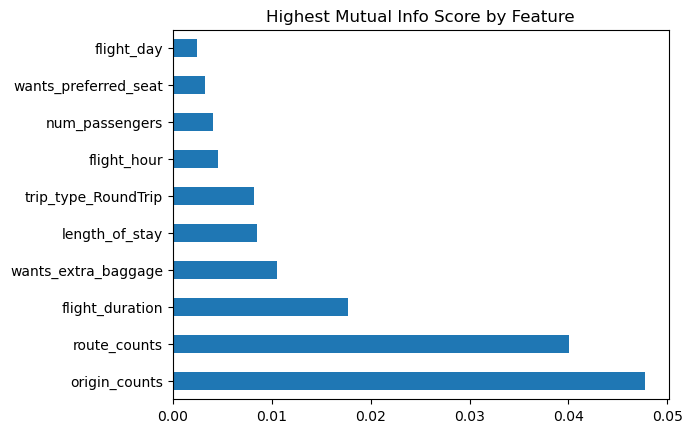

In [132]:
mi_scores.head(10).plot(kind="barh", title = "Highest Mutual Info Score by Feature")
plt.savefig("fig9.png")
plt.show()

In [127]:
#drop columns
feats.drop(columns = ["route", "booking_origin", "group_size"], axis = 1, inplace = True)

In [147]:
#new features/target set
X = feats
y = tar

In [148]:
#split into training & test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [149]:
#check shape
X_train.shape, X_test.shape

((35000, 16), (15000, 16))

In [150]:
#import random forest classifier, and run model with 10 decision trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C:\Users\adaml\AppData\Local\Temp\ipykernel_18856\3087488057.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Model accuracy score with 10 decision-trees : 0.8531


In [151]:
#run model with 100 decision trees
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

C:\Users\adaml\AppData\Local\Temp\ipykernel_18856\3585426439.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_100.fit(X_train, y_train)


Model accuracy score with 100 decision-trees : 0.8531


In [153]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)


C:\Users\adaml\AppData\Local\Temp\ipykernel_18856\2820603475.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


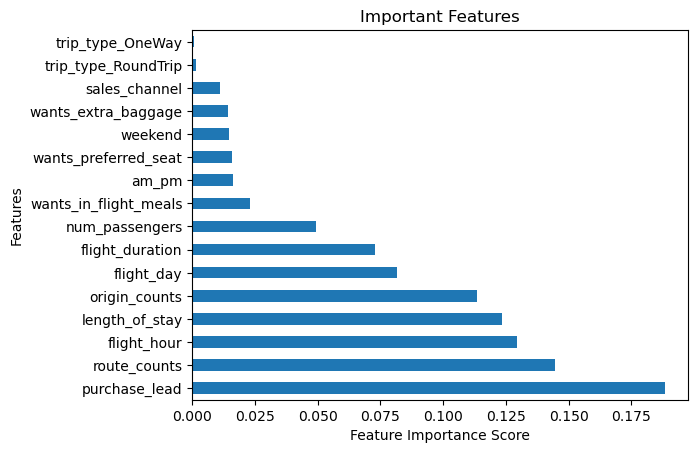

In [156]:
#plot most important features
feature_scores.plot(kind="barh", title = "Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.savefig("fig10.png")
plt.show()

The most important variables to determine if a customer will complete their booking are the number of days prior to purchase,
the popularity of the route, the time of flight, the length of the trip, and the popularity of the origin of the flight.

In [168]:
#print classification report - good at determining if a customer will not complete a booking, but not at determining if a 
#customer will complete the booking
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     12784
           1       0.51      0.10      0.17      2216

    accuracy                           0.85     15000
   macro avg       0.69      0.54      0.54     15000
weighted avg       0.81      0.85      0.81     15000



In [169]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[12571   213]
 [ 1991   225]]
